In [1]:

import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


Mounted at /content/drive


In [2]:
pip install tensorflow scikit-learn

In [3]:
df= pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
feats=df.drop('Churn',axis=1)
target=df['Churn']

In [6]:
categoryX = feats.select_dtypes(include='object')
target

cat_colns= categoryX.select_dtypes(include='object').columns

col_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), cat_colns)],
    remainder='passthrough'
)

encodeX= col_transformer.fit_transform(categoryX)


mutual_info = mutual_info_classif(encodeX, target)

df_mutual_info = pd.DataFrame(mutual_info, index=col_transformer.get_feature_names_out(categoryX.columns), columns=['Mutual Information'])



In [7]:
pd.set_option('display.max_rows', None)


print(df_mutual_info.sort_values(by='Mutual Information', ascending=False))

                                                  Mutual Information
encoder__Contract_Month-to-month                        9.188659e-02
encoder__OnlineSecurity_No                              6.139612e-02
encoder__Contract_Two year                              6.057694e-02
encoder__TechSupport_No                                 5.927526e-02
encoder__InternetService_Fiber optic                    4.780875e-02
encoder__PaymentMethod_Electronic check                 4.392083e-02
encoder__OnlineBackup_No                                3.599562e-02
encoder__DeviceProtection_No                            3.190766e-02
encoder__StreamingMovies_No internet service            3.136973e-02
encoder__InternetService_No                             3.136973e-02
encoder__TechSupport_No internet service                3.136973e-02
encoder__DeviceProtection_No internet service           3.136973e-02
encoder__OnlineBackup_No internet service               3.136973e-02
encoder__OnlineSecurity_No interne

In [8]:
df= df.drop('customerID', axis=1 )

In [9]:
print(df_mutual_info.sort_values(by='Mutual Information', ascending=False))

                                                  Mutual Information
encoder__Contract_Month-to-month                        9.188659e-02
encoder__OnlineSecurity_No                              6.139612e-02
encoder__Contract_Two year                              6.057694e-02
encoder__TechSupport_No                                 5.927526e-02
encoder__InternetService_Fiber optic                    4.780875e-02
encoder__PaymentMethod_Electronic check                 4.392083e-02
encoder__OnlineBackup_No                                3.599562e-02
encoder__DeviceProtection_No                            3.190766e-02
encoder__StreamingMovies_No internet service            3.136973e-02
encoder__InternetService_No                             3.136973e-02
encoder__TechSupport_No internet service                3.136973e-02
encoder__DeviceProtection_No internet service           3.136973e-02
encoder__OnlineBackup_No internet service               3.136973e-02
encoder__OnlineSecurity_No interne

In [20]:
essential_feats=['Contract', 'OnlineSecurity','TechSupport','InternetService','MultipleLines','StreamingMovies','PaymentMethod','OnlineBackup','Partner','Dependents','TotalCharges','PaperlessBilling]

In [21]:
ds= pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv', usecols= essential_feats)
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Partner           7043 non-null   object
 1   Dependents        7043 non-null   object
 2   MultipleLines     7043 non-null   object
 3   InternetService   7043 non-null   object
 4   OnlineSecurity    7043 non-null   object
 5   OnlineBackup      7043 non-null   object
 6   TechSupport       7043 non-null   object
 7   StreamingMovies   7043 non-null   object
 8   Contract          7043 non-null   object
 9   PaperlessBilling  7043 non-null   object
 10  PaymentMethod     7043 non-null   object
 11  TotalCharges      7043 non-null   object
 12  Churn             7043 non-null   object
dtypes: object(13)
memory usage: 715.4+ KB


In [12]:
encoded_ds=pd.get_dummies(ds,columns=['Contract','OnlineSecurity','TechSupport','InternetService','MultipleLines','StreamingMovies','PaymentMethod','OnlineBackup','Partner','Dependents','TotalCharges','PaperlessBilling'])

In [13]:
encoded_ds = ds.copy()  # Create a copy of the original DataFrame

label_encoder = LabelEncoder()

for column in ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService', 'MultipleLines',
               'StreamingMovies', 'PaymentMethod', 'OnlineBackup', 'Partner', 'Dependents', 'TotalCharges',
               'PaperlessBilling']:
    encoded_ds[column] = label_encoder.fit_transform(ds[column])

In [14]:
encoded_ds

Output hidden; open in https://colab.research.google.com to view.

In [22]:
#OneHot Encoding
encoder= OneHotEncoder(sparse=False, drop='first')

#Transforming and Fitting
encoded_target = encoder.fit_transform(df[['Churn']])


# one-hot encoded dataframe columns
encoded_df=pd.DataFrame(encoded_target, columns=[f'Churn_{class_name}' for class_name in encoder.get_feature_names_out(['Churn'])])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [23]:
encoded_df

,Churn_Churn_Yes
0,0.0
1,0.0
2,1.0
3,0.0
4,1.0
5,1.0
6,0.0
7,0.0
8,1.0
9,0.0


In [24]:
X_train,X_test,y_train,y_test= train_test_split(encoded_ds, encoded_df, test_size=0.2, random_state=42)

In [25]:
scaler=StandardScaler()
scaled_xtrain= scaler.fit_transform(X_train)
scaled_xtest= scaler.transform(X_test)

In [26]:
#  MLP model definition using the Functional API
input_layer = Input(shape=(scaled_xtrain.shape[1],))
hidden_layer1 = Dense(64, activation='relu')(input_layer)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer2)  # Keep sigmoid activation

#  model
model = Model(inputs=input_layer, outputs=output_layer)

#  Adam optimizer and binary_crossentropy (Binary Classification)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(scaled_xtrain, encoded_df, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
159/159 [==============================] - 2s 4ms/step - loss: 0.5974 - accuracy: 0.7142 - val_loss: 0.5990 - val_accuracy: 0.7234
Epoch 2/10
159/159 [==============================] - 0s 3ms/step - loss: 0.5771 - accuracy: 0.7373 - val_loss: 0.5955 - val_accuracy: 0.7234
Epoch 3/10
159/159 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.7373 - val_loss: 0.5985 - val_accuracy: 0.7234
Epoch 4/10
159/159 [==============================] - 0s 3ms/step - loss: 0.5709 - accuracy: 0.7373 - val_loss: 0.5949 - val_accuracy: 0.7234
Epoch 5/10
159/159 [==============================] - 1s 3ms/step - loss: 0.5697 - accuracy: 0.7373 - val_loss: 0.5959 - val_accuracy: 0.7234
Epoch 6/10
159/159 [==============================] - 1s 4ms/step - loss: 0.5668 - accuracy: 0.7373 - val_loss: 0.5954 - val_accuracy: 0.7234
Epoch 7/10
159/159 [==============================] - 1s 4ms/step - loss: 0.5657 - accuracy: 0.7371 - val_loss: 0.5939 - val_accuracy: 0.7234
Epoch 

In [146]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_10 (Dense)            (None, 64)                896       
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
# test set prediction
predictions= model.predict(scaled_xtest)
binarypredictions= (predictions>0.5).astype(int)

#Model Accuracy
accuracy= accuracy_score(y_test,binarypredictions)
print(f'Test Accuracy:{accuracy * 100 }')

45/45 [==============================] - 0s 4ms/step
Test Accuracy:73.17246273953158


In [31]:

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [0.001, 0.01, 0.1],
}


#  MLPClassification
mlp = MLPClassifier(max_iter=100)

#  GridSearchCV setting up
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the search on the training set
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_


bestmodel = MLPClassifier(max_iter=100, **best_params)
bestmodel.fit(scaled_xtrain, y_train)


test_accuracy = bestmodel.score(scaled_xtest, y_test)
print(f'Test Accuracy: {test_accuracy}')
print(best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.7885024840312278
{'activation': 'tanh', 'hidden_layer_sizes': (128,), 'learning_rate_init': 0.001}


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [32]:
#Predicting from the test set
testpred = bestmodel.predict(scaled_xtest)
testpred

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [34]:
#Confusion Matrix
confusionmat = confusion_matrix(y_test, testpred)
print(confusionmat)

[[938  98]
 [200 173]]


In [35]:
#Classification Report
classrep = classification_report(y_test, testpred)
print(classrep)

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86      1036
         1.0       0.64      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409



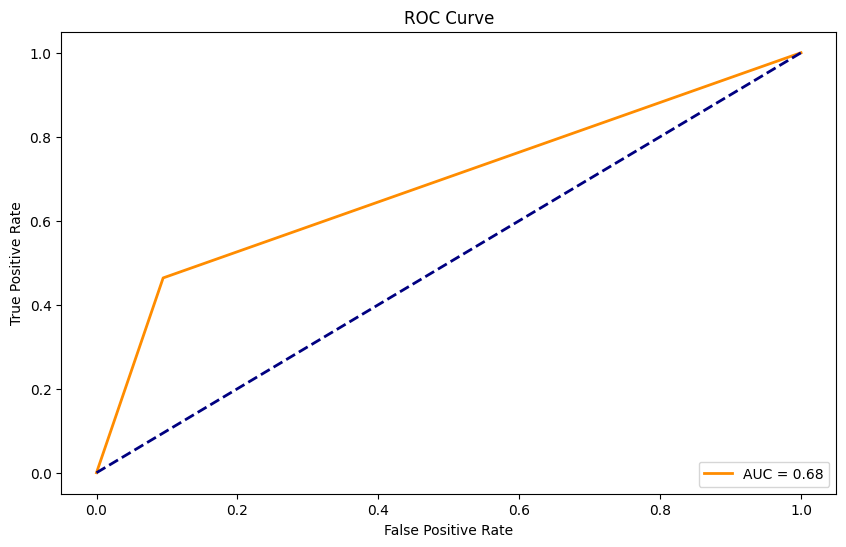

In [38]:
#Calculating ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, testpred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [37]:
from joblib import dump
dump(scaler, '/content/drive/My Drive/Colab Notebooks/scalerChurn1.pkl')
model.save('/content/drive/My Drive/Colab Notebooks/AImodel1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
